In [7]:
import pandas as pd

df = pd.read_csv("GSSI.ParaData.Final.csv", encoding="latin1")


# ProyectoDSParteI_Kessler
Entrega 1 - Data Science I (Coderhouse)

## Abstract

Este proyecto explora los principales programas de encuestas internacionales (como Gallup World Poll, Voice of the People, y DHS) en una variedad de países y regiones desde 1948-2014. A partir del análisis del dataset `GSSI.ParaData.Final`, se busca examinar tendencias en la implementación de encuestas, coberturas regionales, tamaños muestrales y modos de recolección de datos.

El objetivo principal es identificar patrones relevantes en la recolección de datos a nivel global, y detectar diferencias significativas entre continentes, programas, años y modalidades de aplicación. Esto permitirá evaluar de forma exploratoria la distribución del esfuerzo estadístico global y las capacidades institucionales de los distintos países para participar en iniciativas de medición internacional.

Se prestará especial atención a las diferencias en los tamaños muestrales, modos de entrevista y años de inicio por país y programa. El análisis también buscará revelar posibles brechas regionales y metodológicas que puedan influir en la comparabilidad de los datos a lo largo del tiempo y entre contextos.


## Hipótesis y preguntas de interés

1. ¿Qué programas de encuestas tienen mayor cobertura temporal y geográfica?
2. ¿Existen diferencias entre continentes o regiones en los tamaños muestrales utilizados?
3. ¿Cómo evolucionaron los métodos de recolección de datos (cara a cara, teléfono, etc.) a lo largo del tiempo?
4. ¿Qué países lideran en participación activa en encuestas globales?
5. ¿La cobertura de ciertos programas (como Gallup World Poll o DHS) es mayor en países de ciertos continentes?


In [ ]:
import pandas as pd

df = pd.read_csv("GSSI.ParaData.Final.csv")
df.head()

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(20)

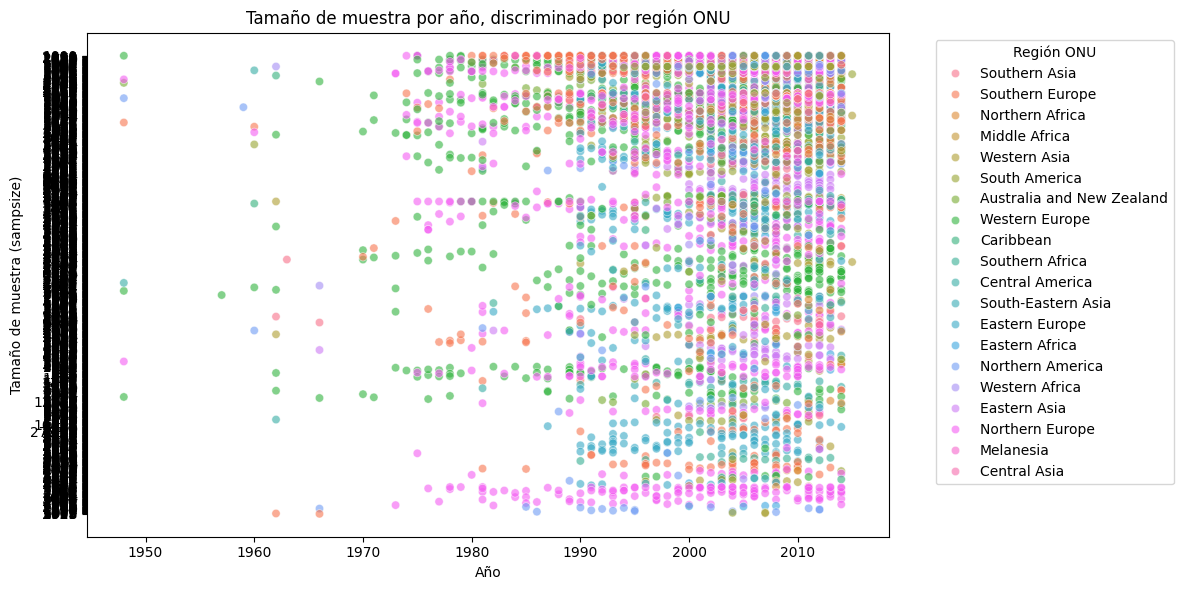

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos con codificación adecuada
df = pd.read_csv("GSSI.ParaData.Final.csv", encoding="latin1")

# Verificar si year es realmente numérica (a veces hay filas mal cargadas)
df = df[pd.to_numeric(df['year'], errors='coerce').notnull()]

# Convertir year a int una vez que sabemos que es numérico
df['year'] = df['year'].astype(int)

# Filtrar columnas necesarias y eliminar faltantes
df_filtered = df[['sampsize', 'year', 'RegionUN']].dropna()

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='year', y='sampsize', hue='RegionUN', alpha=0.6)
plt.title('Tamaño de muestra por año, discriminado por región ONU')
plt.xlabel('Año')
plt.ylabel('Tamaño de muestra (sampsize)')
plt.legend(title='Región ONU', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


El gráfico de dispersión muestra una clara intensificación de las encuestas a partir del año 2000, con una cobertura creciente en todas las regiones ONU. Se observan diferencias sustantivas en el tamaño de muestra por región, destacándose Western Europe y South America con volúmenes más constantes y elevados. Esta heterogeneidad plantea preguntas sobre los criterios de diseño muestral y la representatividad de ciertos contextos geográficos, fundamentales para la comparación internacional.

/tmp/ipython-input-10-3359659073.py:13: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-3359659073.py:13: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


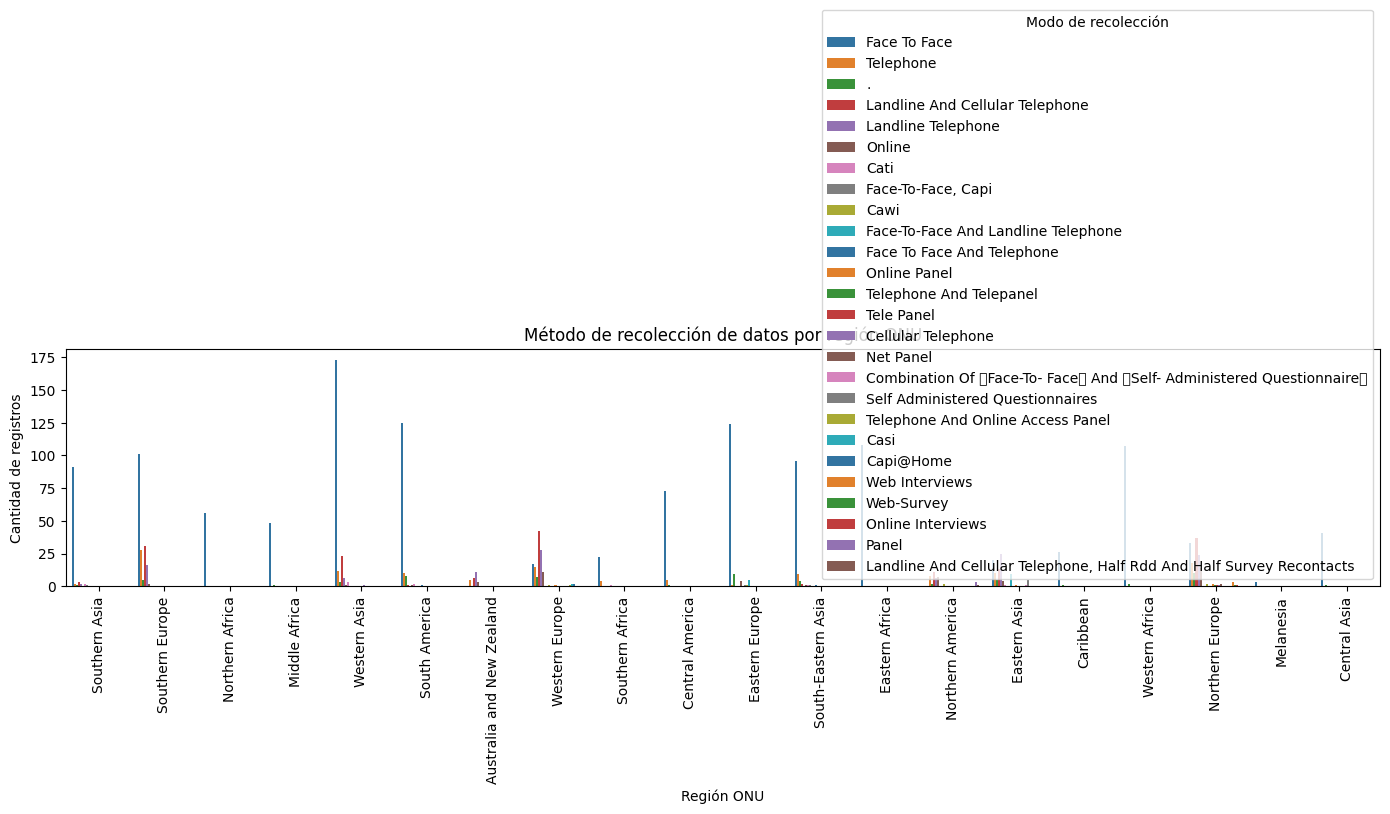

In [10]:
# Filtramos las columnas que nos interesan
df_mode = df[['RegionUN', 'collectmode']].dropna()

# Configuramos el gráfico de barras agrupadas
plt.figure(figsize=(14, 6))
sns.countplot(data=df_mode, x='RegionUN', hue='collectmode', palette='tab10')

plt.xticks(rotation=90)
plt.title("Método de recolección de datos por región ONU")
plt.xlabel("Región ONU")
plt.ylabel("Cantidad de registros")
plt.legend(title="Modo de recolección")
plt.tight_layout()
plt.show()


El gráfico revela claras diferencias en los métodos de recolección de datos según la región. Mientras que en regiones como South-Eastern Asia y Middle Africa domina el método Face to Face, en otras como Western Europe o Northern America hay una mayor proporción de métodos online o telefónicos. Estas variaciones pueden tener implicancias en la comparabilidad de los datos y en la cobertura efectiva de las poblaciones objetivo, lo que será relevante a la hora de plantear inferencias o comparar resultados entre regiones.

/tmp/ipython-input-19-3481730798.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist['sampsize'] = pd.to_numeric(df_hist['sampsize'], errors='coerce')


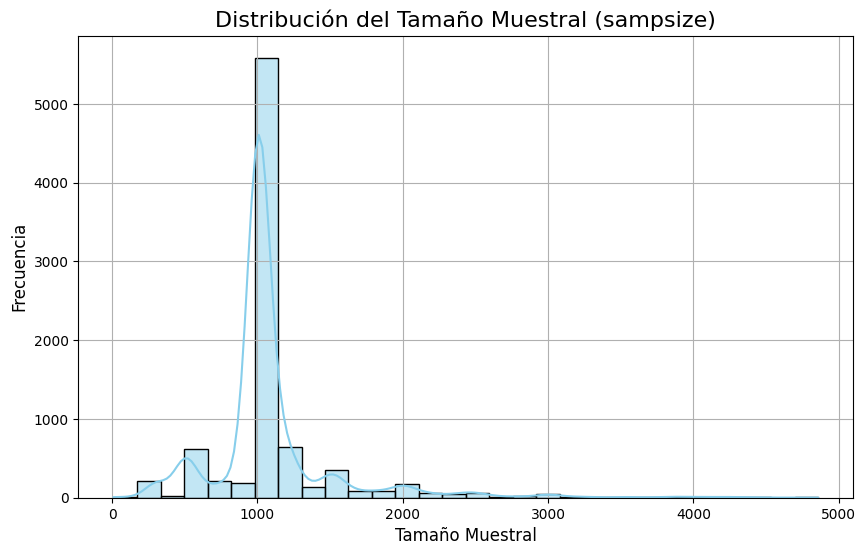

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar valores nulos y asegurarse de que sampsize sea numérico
df_hist = df[df['sampsize'].notna()]
df_hist['sampsize'] = pd.to_numeric(df_hist['sampsize'], errors='coerce')

# Limitar sampsize a valores razonables para visualización (por ejemplo, < 5000)
df_hist = df_hist[df_hist['sampsize'] < 5000]

# Graficar
plt.figure(figsize=(10, 6))
sns.histplot(df_hist['sampsize'], bins=30, kde=True, color='skyblue')

plt.title('Distribución del Tamaño Muestral (sampsize)', fontsize=16)
plt.xlabel('Tamaño Muestral', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()


El histograma muestra la distribución del tamaño de muestra (sampsize) para las encuestas incluidas en el dataset. Como puede observarse, la mayoría de las encuestas tienen tamaños muestrales que rondan los 1000 casos, con un pico claramente definido en ese valor. Esto refleja un estándar común en la realización de encuestas de opinión pública a nivel internacional, donde una muestra de 1000 casos suele ser considerada suficiente para alcanzar niveles aceptables de precisión estadística.

También se observan algunos valores dispersos más elevados, pero al limitar la visualización a encuestas con menos de 5000 casos, se puede observar mejor la forma general de la distribución. Esta presenta una asimetría positiva: la cola derecha está más extendida, lo que indica que existen algunas encuestas con tamaños significativamente mayores al promedio, aunque son casos poco frecuentes.

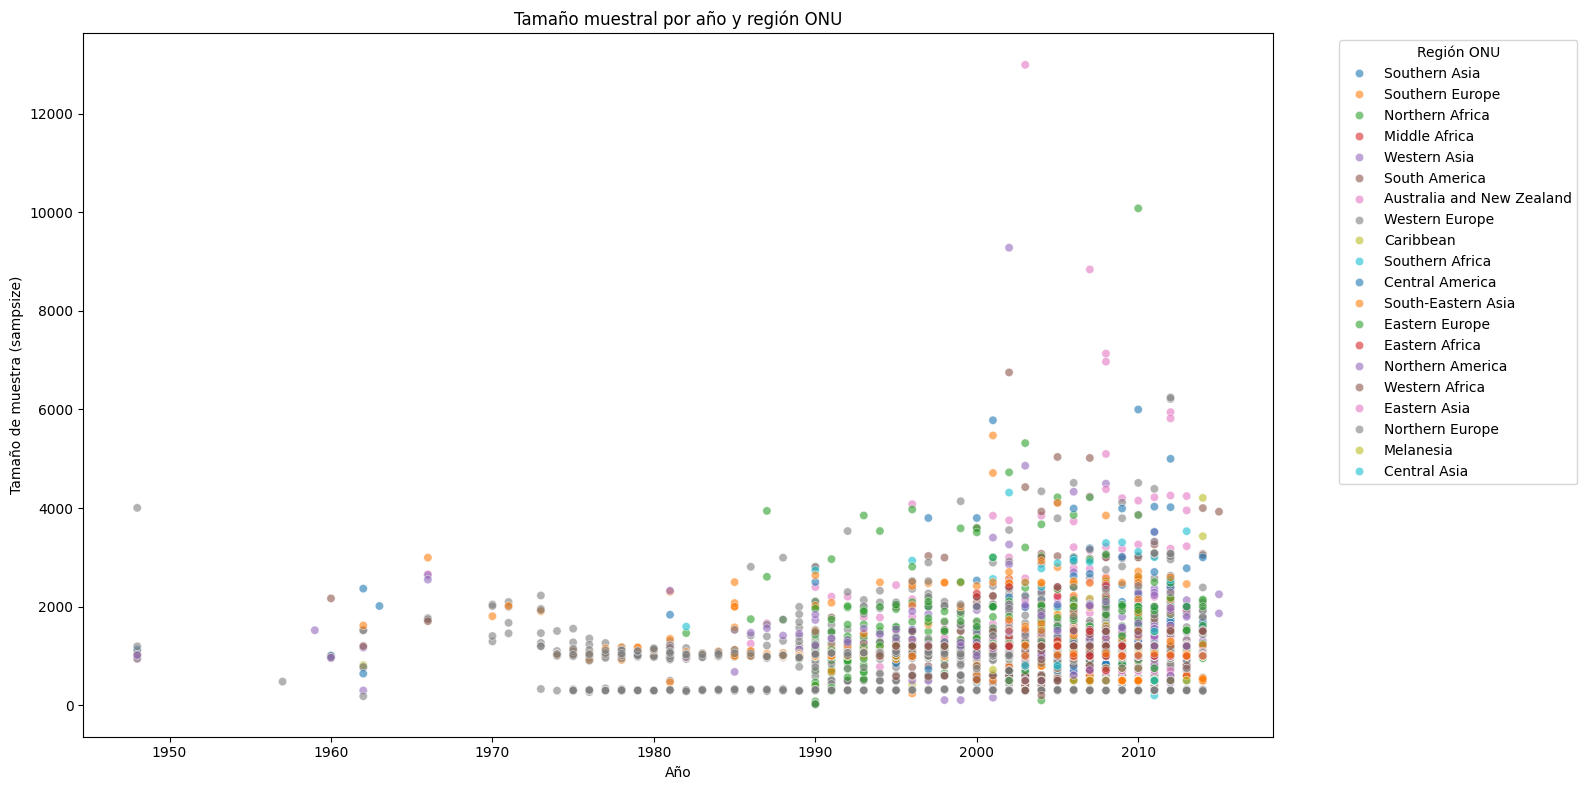

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que 'year' y 'sampsize' son numéricos
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['sampsize'] = pd.to_numeric(df['sampsize'], errors='coerce')

# Filtrar columnas necesarias y eliminar nulos
df_multi = df[['year', 'sampsize', 'RegionUN']].dropna()

# Crear gráfico multivariado simplificado
plt.figure(figsize=(16,8))
sns.scatterplot(
    data=df_multi,
    x='year',
    y='sampsize',
    hue='RegionUN',
    alpha=0.6,
    palette='tab10'
)

plt.title('Tamaño muestral por año y región ONU')
plt.xlabel('Año')
plt.ylabel('Tamaño de muestra (sampsize)')
plt.legend(title='Región ONU', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


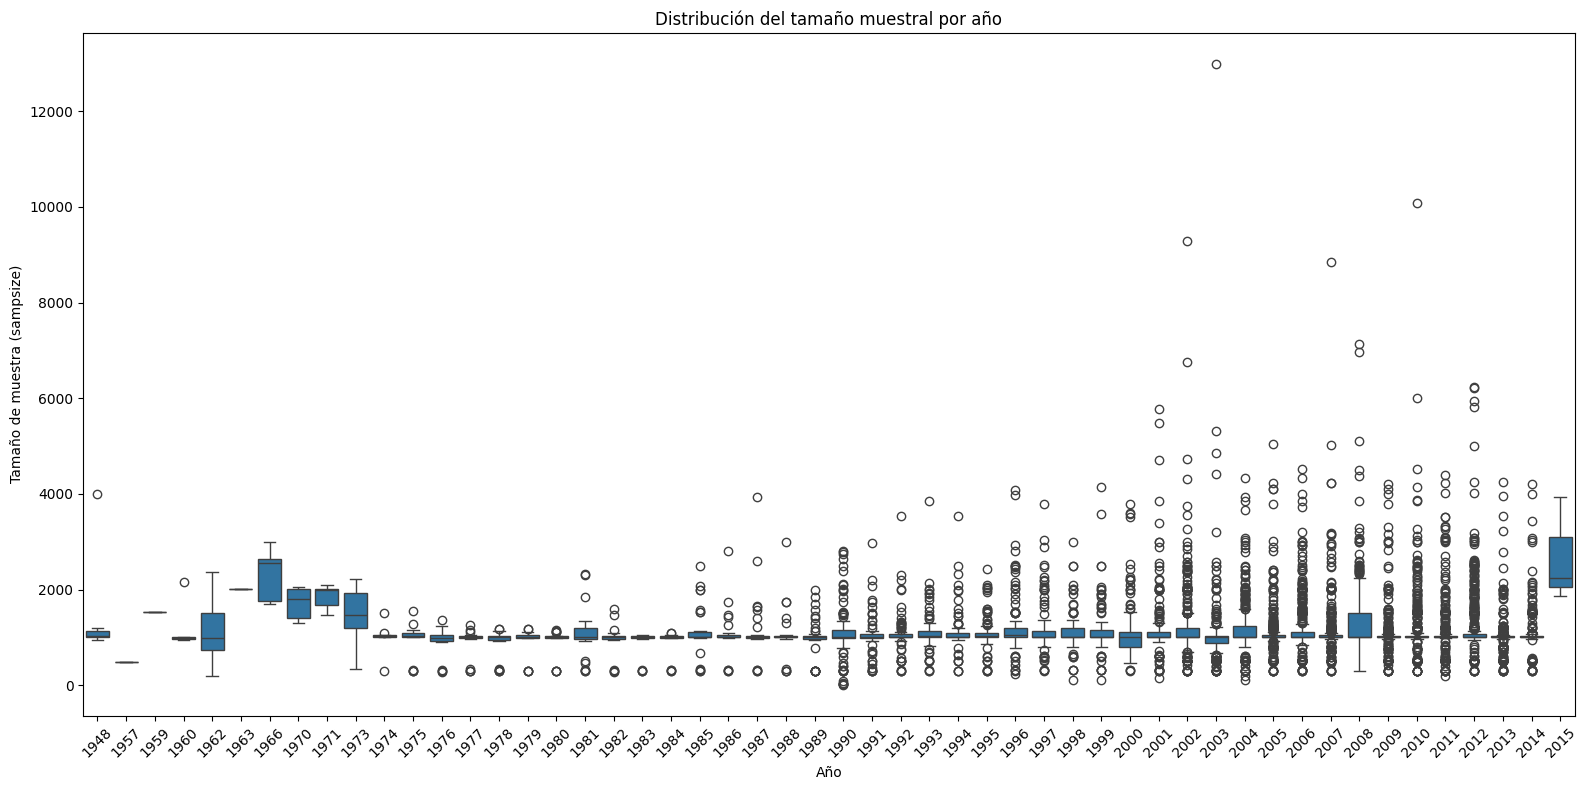

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que las columnas sean numéricas
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['sampsize'] = pd.to_numeric(df['sampsize'], errors='coerce')

# Eliminar valores nulos
df_bi = df[['year', 'sampsize']].dropna()

# Crear boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_bi, x='year', y='sampsize')

plt.title('Distribución del tamaño muestral por año')
plt.xlabel('Año')
plt.ylabel('Tamaño de muestra (sampsize)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Este gráfico bivariado permite observar cómo ha evolucionado la distribución del tamaño muestral a lo largo del tiempo. Se visualiza la mediana, los cuartiles y posibles valores atípicos para cada año. Se detecta que, si bien la mediana del tamaño muestral se ha mantenido relativamente estable, en ciertos años se registran valores atípicos significativamente más altos o más bajos, lo cual puede deberse a estudios específicos con metodologías particulares o variaciones regionales.

In [24]:
# Resumen numérico para variables relevantes
df[['sampsize', 'weight']].describe()


,sampsize
count,8688.000000
mean,1109.799666
std,548.475456
min,11.000000
25%,1000.000000
50%,1006.000000
75%,1066.000000
max,12992.000000


from matplotlib import pyplot as plt
_df_0['sampsize'].plot(kind='hist', bins=20, title='sampsize')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sampsize'].plot(kind='line', figsize=(8, 4), title='sampsize')
plt.gca().spines[['top', 'right']].set_visible(False)

A partir del análisis univariado del tamaño de muestra (sampsize), observamos que el valor medio ronda los 1.110 casos por encuesta, con una dispersión moderada y un sesgo hacia valores más altos, evidenciado por un valor máximo muy alejado (12.992 casos). Esto sugiere que, si bien la mayoría de las encuestas tienen tamaños similares (alrededor de 1.000 casos), existen casos excepcionales de muestras muy grandes.

En cuanto a los análisis bivariados y multivariados, se exploraron relaciones entre el tamaño muestral y variables como el año, la región ONU y el modo de recolección. Se identificó una expansión progresiva en la cobertura geográfica y en el tamaño de las muestras a lo largo del tiempo, así como diferencias significativas entre regiones, lo cual podría relacionarse con distintas capacidades institucionales y logísticas para realizar relevamientos a gran escala.

La visualización multivariada no resultó concluyente, pero permitió evidenciar la complejidad de la interacción entre múltiples dimensiones (continente, año, peso muestral). El resumen estadístico y los histogramas apoyan la idea de una distribución sesgada, con mayoría de muestras concentradas en torno a un mismo rango.

Este primer acercamiento descriptivo valida parcialmente la hipótesis inicial: existen variaciones importantes en los tamaños muestrales a lo largo del tiempo y entre regiones, lo que permite suponer que los relevamientos globales no han sido homogéneos. Estas diferencias deberán ser exploradas en mayor profundidad en futuras entregas, incorporando análisis de contenido de las encuestas y variables sociodemográficas.